<a href="https://colab.research.google.com/github/PavanNR958/CMTI-Internship/blob/main/Data_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


In [2]:
#loading the dataset to a pandas Dataframe
data = pd.read_csv('/content/dataclassifier.csv', header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6
0,71.096901,26.608788,223.390701,7.504555,50.348072,999.917542,bad
1,74.083015,27.361013,223.390701,7.504555,50.348072,999.917542,bad
2,74.083015,27.361013,223.390701,7.504555,50.348072,999.917542,bad
3,74.083015,27.361013,223.390701,7.957099,50.348072,999.917542,bad
4,74.083015,27.361013,223.390701,7.957099,50.575344,999.917542,bad


In [4]:
data.shape

(2380, 7)

In [5]:
data.describe()  #describe --> statistical measures of the data

,0,1,2,3,4,5
count,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000
mean,34.280444,24.227259,414.368484,12.233777,49.881449,5203.663656
std,26.816703,9.219163,112.308988,5.909778,2.251698,2931.721904
min,0.762931,2.588330,212.010941,0.337238,44.982628,999.814209
25%,14.973627,18.462238,384.185242,8.071628,48.272422,2642.875977
50%,25.650256,28.538145,401.032471,15.504702,50.136101,4999.902100
75%,53.706425,30.716609,437.459671,17.400202,51.251587,7991.113770
max,91.614937,33.182468,634.900818,18.227634,55.203125,10011.616211


In [6]:
data[6].value_counts()

bad     1611
good     769
Name: 6, dtype: int64

In [7]:
data.groupby(6).mean()

,0,1,2,3,4,5
6,,,,,,
bad,43.460757,29.742939,432.390963,15.296741,49.489844,5028.671430
good,15.048344,12.672304,376.612679,5.817086,50.701835,5570.259853


In [8]:
X=data.drop(columns=6,axis=1)
Y=data[6]

In [9]:
print(X,Y)

              0          1           2         3          4            5
0     71.096901  26.608788  223.390701  7.504555  50.348072   999.917542
1     74.083015  27.361013  223.390701  7.504555  50.348072   999.917542
2     74.083015  27.361013  223.390701  7.504555  50.348072   999.917542
3     74.083015  27.361013  223.390701  7.957099  50.348072   999.917542
4     74.083015  27.361013  223.390701  7.957099  50.575344   999.917542
...         ...        ...         ...       ...        ...          ...
2375   6.923076  12.790550  414.053680  7.374869  50.084717  9999.598633
2376   6.923076  12.790550  423.232147  7.374869  50.084717  9999.598633
2377   6.923076  12.790550  423.232147  7.374869  50.084717  9999.598633
2378   6.923076  14.506275  423.232147  7.374869  50.084717  9999.598633
2379   7.943905  14.506275  423.232147  7.374869  50.084717  9999.598633

[2380 rows x 6 columns] 0        bad
1        bad
2        bad
3        bad
4        bad
        ... 
2375    good
2376    

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=2)

In [11]:
print(X.shape,xtrain.shape,xtest.shape)

(2380, 6) (1904, 6) (476, 6)


In [12]:
model=LogisticRegression()

In [13]:
  model.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
#accuracy on training data
xtrain_prediction = model.predict(xtrain)
training_data_accuracy = accuracy_score(xtrain_prediction, ytrain)

In [15]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.9779411764705882


In [16]:
#accuracy on test data
X_test_prediction = model.predict(xtest)
test_data_accuracy = accuracy_score(X_test_prediction, ytest)

In [17]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.976890756302521


In [18]:
input_data = (0.902670621871948,3.3454144001007,382.33413696289,0.591761946678161,48.046760559082,5999.76953125)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
# print(prediction)

if(prediction[0]=='bad'):
  print('The data is bad')
else:
  print('The data is good')

The data is good


['good']
['bad']
['bad']
['bad']
['bad']
['bad']
['good']
['good']
['good']
['good']
['good']
['good']


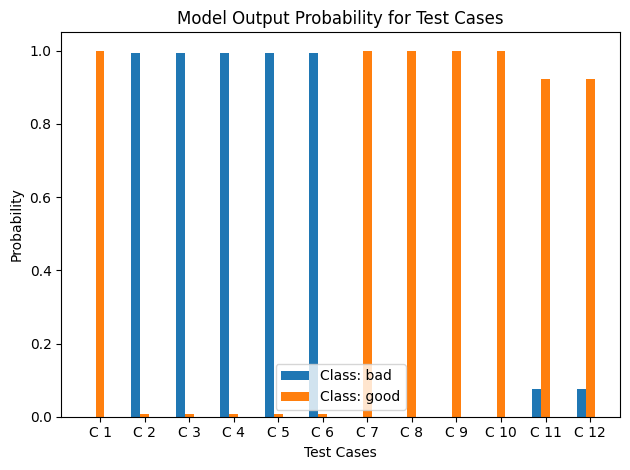

In [20]:
test_cases = [
    (0.902670621871948, 3.3454144001007, 382.33413696289, 0.591761946678161, 48.046760559082, 5999.76953125),
    (78.9056930541992,28.6504192352294,226.423141479492,8.24589443206787,50.2469940185546,1000.00762939453),
(78.9056930541992,28.6504192352294,226.423141479492,8.24589443206787,50.2469940185546,1000.07263183593),
(78.9056930541992,28.6504192352294,226.178741455078,8.24589443206787,50.2469940185546,1000.07263183593),
(78.9056930541992,28.7136154174804,226.178741455078,8.24589443206787,50.2469940185546,1000.07263183593),
(78.1580963134765,28.7136154174804,226.178741455078,8.24589443206787,50.2469940185546,1000.07263183593),
(58.8959655761718,23.2695560455322,387.89810180664,12.9282808303833,55.203125,1999.96264648437),
(58.8959655761718,23.2695560455322,387.89810180664,12.9282808303833,55.203125,1999.96264648437),
(58.8959655761718,23.2695560455322,387.89810180664,12.9282808303833,55.203125,1999.84265136718),
(58.8959655761718,23.2695560455322,391.018585205078,12.9282808303833,55.203125,1999.84265136718),
(58.8959655761718,27.7841415405273,391.018585205078,12.9282808303833,55.203125,1999.84265136718),
(58.8959655761718,27.7841415405273,391.018585205078,12.9282808303833,55.203125,1999.84265136718)
    ]

# Initialize lists to store predictions and probabilities
predictions = []
probabilities_list = []

# Loop through test cases and make predictions
for input_data in test_cases:
    # Convert input data to a numpy array and reshape it
    input_data_as_numpy_array = np.asarray(input_data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

    # Predict the class (bad or good)
    prediction = model.predict(input_data_reshaped)
    print(prediction)

    # Store the prediction
    predictions.append(prediction[0])

    # Get class probabilities
    probabilities = model.predict_proba(input_data_reshaped)[0]
    probabilities_list.append(probabilities)

# Create a bar chart to visualize the model's output probability for all test cases
class_labels = model.classes_
bar_width = 0.2
fig, ax = plt.subplots()

for i, label in enumerate(class_labels):
    probabilities = [probs[i] for probs in probabilities_list]
    x = np.arange(len(test_cases)) + i * bar_width
    ax.bar(x, probabilities, width=bar_width, label=f'Class: {label}')

ax.set_xlabel('Test Cases')
ax.set_ylabel('Probability')

ax.set_title('Model Output Probability for Test Cases')
ax.set_xticks(np.arange(len(test_cases)) + bar_width * (len(class_labels) / 2))
ax.set_xticklabels([f'C {i+1}' for i in range(len(test_cases))])
ax.legend()
plt.tight_layout()
plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(xtrain, ytrain)
y_pred2 = model2.predict(xtest)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(ytest,y_pred2))

Accuracy Score: 0.9978991596638656


In [22]:
input_data = (0.902670621871948,3.3454144001007,382.33413696289,0.591761946678161,48.046760559082,5999.76953125)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model2.predict(input_data_reshaped)
# print(prediction)

if(prediction[0]=='bad'):
  print('The data is bad')
else:
  print('The data is good')

The data is good


In [26]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(xtrain,ytrain)
y_pred3 = model3.predict(xtest)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(ytest,y_pred3))

Accuracy Score: 0.9726890756302521


In [27]:
input_data = (0.902670621871948,3.3454144001007,382.33413696289,0.591761946678161,48.046760559082,5999.76953125)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model3.predict(input_data_reshaped)
# print(prediction)

if(prediction[0]=='bad'):
  print('The data is bad')
else:
  print('The data is good')

The data is good
